<a href="https://colab.research.google.com/github/layansg/DIO-DESAFIO-analise-de-dados-com-python-e-pandas/blob/main/Pandas_AulaPlanilhas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabalhando com planilhas do Excel**

In [1]:
# Importando a biblioteca
import pandas as pd

In [3]:
# Leitura dos arquivos
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [7]:
# Juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [9]:
# Exibindo as 5 primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [10]:
# Exibindo as 5 ultimas linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [11]:
# Exibir uma amostra aleatória
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
196,Natal,2019-01-02,145.09,1036,2
53,Salvador,2019-01-01,39.50,1035,3
21,Salvador,2019-01-01,39.72,1035,3
79,Salvador,2019-01-01,19.02,1034,2
78,Aracaju,2018-01-01,154.85,1522,9


In [12]:
#Verificando o tipo de dado de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [13]:
# Alterando o tipo de dado da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

## Tratamento de dados faltantes 

In [15]:
# Consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [16]:
# Substituindo os valores nulos pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [17]:
# Substituindo os valores nulos por zero
df["Vendas"].fillna(0, inplace=True)

In [18]:
# Apagando as linhas com valores nulos
df.dropna(inplace=True)

In [23]:
# Apagando as linhas com valores nulos apenas em uma coluna
df.dropna(subset=["Vendas"], inplace=True)

In [24]:
# Removendo linhas com valores nulos em todas as colunas
df.dropna(how="all")

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8
...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1


## Criando colunas novas

In [27]:
# Criando a coluna de receitas
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [29]:
# Retornando a maior receita
df["Receita"].max()

3544.0

In [30]:
# Retornando a maior receita
df["Receita"].min()

3.34

In [36]:
# Retornando os maiores valores de receita
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [38]:
# Retornando os menores valores de receita
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [39]:
# Agrupamento por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [40]:
# Ordenando o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


## Trabalhando com datas

In [41]:
# Transformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

In [42]:
# Verificando o tipo de dado de cada coluna
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

In [44]:
# Transformando a coluna de data em tipo datetime
df["Data"] = pd.to_datetime(df["Data"])

In [46]:
# Agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [47]:
# Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
82,Natal,2019-03-07,868.00,854,3,2604.00,2019
205,Salvador,2019-01-02,196.09,1037,1,196.09,2019
48,Salvador,2019-01-01,127.28,1035,2,254.56,2019
11,Fortaleza,2019-01-01,42.19,1003,3,126.57,2019
12,Fortaleza,2019-01-01,80.73,1004,2,161.46,2019


In [48]:
# Extraindo o mês e o dia
df["Mês_Venda"], df["Dia_Venda"] = (df["Data"].dt.month, df["Data"].dt.day)
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mês_Venda,Dia_Venda
124,Natal,2019-01-02,44.82,1034,3,134.46,2019,1,2
37,Natal,2018-10-03,726.00,852,2,1452.00,2018,10,3
57,Natal,2019-02-24,425.00,854,4,1700.00,2019,2,24
2,Fortaleza,2019-02-10,35.33,1004,3,105.99,2019,2,10
66,Fortaleza,2019-01-01,35.11,1005,6,210.66,2019,1,1


In [49]:
# Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [50]:
# Calculando a diferença de dias
df["Diferença_Dias"] = df["Data"] - df["Data"].min()

In [51]:
# Criando coluna de trimestre
df["Trimestre_Venda"] = df["Data"].dt.quarter

In [52]:
# Filtrando as vendas de 2019 do mês de março
vendas_março_2019 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

## Visualização de dados

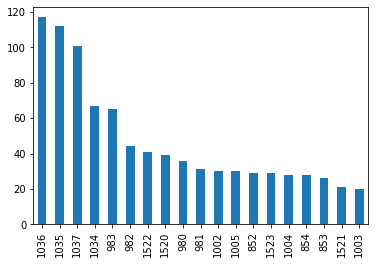

In [53]:
#Gráfico de barras
df["LojaID"].value_counts(ascending=False).plot.bar();

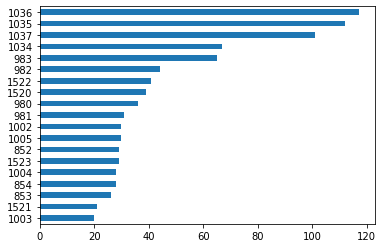

In [54]:
#Gráfico de barras horizontais
df["LojaID"].value_counts(ascending=True).plot.barh();

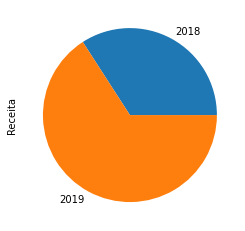

In [56]:
# Gráfico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [58]:
# Total de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Recife       142
Fortaleza    142
Aracaju      130
Name: Cidade, dtype: int64

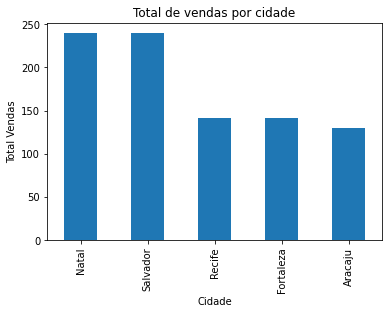

In [59]:
# Adicionando o título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

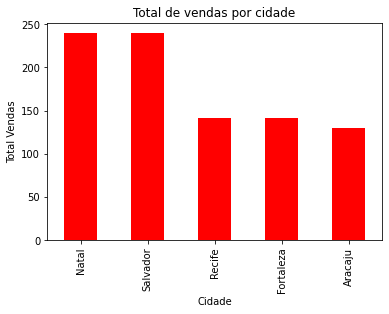

In [60]:
# Alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

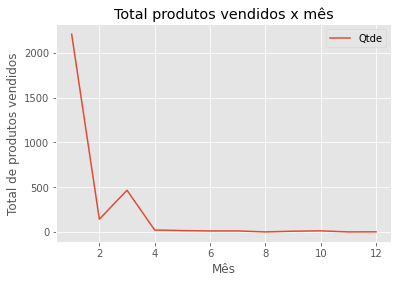

In [70]:
# Alterando o estilo
plt.style.use("ggplot")
df.groupby(df["Mês_Venda"])["Qtde"].sum().plot(title="Total produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total de produtos vendidos")
plt.legend();

In [101]:
# Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]
df_2019.groupby(df_2019["Mês_Venda"])["Receita"].sum().head(10)

Mês_Venda
1    131032.97
2     27532.47
3     63415.01
4      6266.00
Name: Receita, dtype: float64

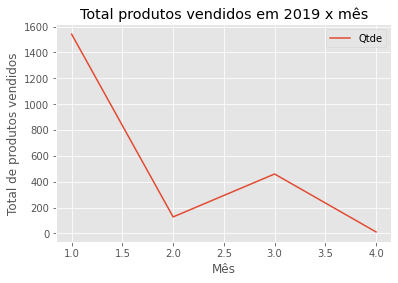

In [102]:
# Total de produtos vendidos por mês
df_2019.groupby(df_2019["Mês_Venda"])["Qtde"].sum().plot(title="Total produtos vendidos em 2019 x mês")
plt.xlabel("Mês")
plt.ylabel("Total de produtos vendidos")
plt.legend();

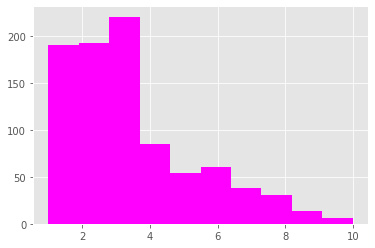

In [103]:
# Histograma
plt.hist(df["Qtde"], color="magenta");

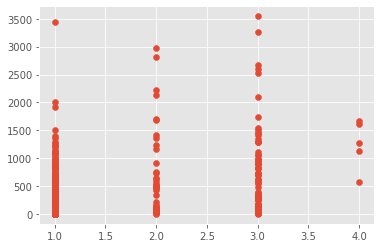

In [104]:
# Dispersão
plt.scatter(x = df_2019["Mês_Venda"], y = df_2019["Receita"]);

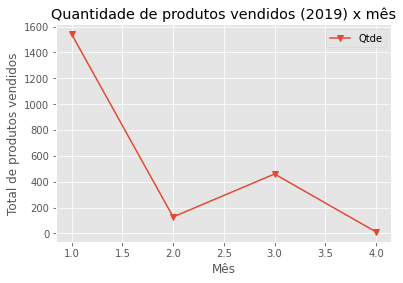

In [106]:
# Salvando em PNG
df_2019.groupby(df_2019["Mês_Venda"])["Qtde"].sum().plot(marker="v")
plt.title("Quantidade de produtos vendidos (2019) x mês")
plt.xlabel("Mês")
plt.ylabel("Total de produtos vendidos")
plt.legend()
plt.savefig("Gráfico QTD x MÊS.png");